# SHMSL (PROFILE)

In [1]:
# force Jupyter to autoreload modules when they have been edited
# this helps keep the iodp module current as it is actively developed.
%load_ext autoreload
%autoreload 2

In [5]:
import sys
import os
from importlib import reload

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colour
import colour.plotting as cp

from iodp import shmsl, utils
reload(shmsl)


<module 'iodp.shmsl' from 'd:\\archive\\hd_files\\data_analysis\\50_laboratory_notebooks\\sod-laboratory\\iodp\\iodp\\shmsl.py'>

In [6]:
# Ensure we are in the PhysicalProperties root folder
if not os.getcwd().endswith("PhysicalProperties"):
    print("Current working directory:", os.getcwd())
    os.chdir("../")
    
print("New current working directory:", os.getcwd())

New current working directory: d:\archive\hd_files\data_analysis\50_laboratory_notebooks\SOD-Laboratory\PhysicalProperties


In [7]:
# ./data/input/PROFILE/COVERED-STANDARDS-20241120_2411202150343_PROFILE.csv
file = './data/input/PROFILE/COVERED-STANDARDS-20241120_20241120215034.PROFILE'
# ./data/input/PROFILE/UNCOVERED-STANDARDS-20241120_2411202113243_PROFILE.csv
# ./data/input/PROFILE/UNCOVERED-STANDARDS-20241120_20241120211324.PROFILE


In [9]:

df = utils.read_instrument_file(file=file, as_dataframe=True)
df.head()

,datetime,labelid,user,text_id,instrument,instrument_group,observed_length,comment,profile,config,positions_excluded
0,2024-11-20 21:50:34 UTC,COVERED-STANDARDS-20241120,,COVERED_STANDARDS_20241120,0) ACUITY MODEL: AR700 AP7020040 S/N: 001918,SHMSL,116.95,These are the Spectralon standards covered wit...,c:\aux_data\profile\covered-standards-20241120...,c:\ims\config_shmsl\i_pi_ar700.ini,FALSE


In [10]:
file = './data/input/PROFILE/COVERED-STANDARDS-20241120_2411202150343_PROFILE.csv'
df = shmsl.read_shmsl_profile_csv(file)
df.head()



d:\archive\hd_files\data_analysis\50_laboratory_notebooks\sod-laboratory\iodp\iodp\shmsl.py:426: UserWarning: As of 4/2/2025 there is one column name less than the total number of columns. Import disregards last column which seems like it is a constant.
  warnings.warn("As of 4/2/2025 there is one column name less than the total number of columns. Import disregards last column which seems like it is a constant.")
d:\archive\hd_files\data_analysis\50_laboratory_notebooks\sod-laboratory\iodp\iodp\shmsl.py:429: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  pd.read_csv(file,index_col=False)


,sample_id,text_id,timestamp,offset(cm),uncorr height(mm),orientation,x-sect area (mm^2),benchmark offset(cm)
0,COVERED-STANDARDS-20241120,COVERED-STANDARDS-20241120,24-11-20 21:50:343 UTC,0.00,38.878,Y-Z plane,42.906,2524.309
1,COVERED-STANDARDS-20241120,COVERED-STANDARDS-20241120,24-11-20 21:50:343 UTC,0.01,38.903,Y-Z plane,42.881,2522.527
2,COVERED-STANDARDS-20241120,COVERED-STANDARDS-20241120,24-11-20 21:50:343 UTC,0.02,38.929,Y-Z plane,42.856,2520.730
3,COVERED-STANDARDS-20241120,COVERED-STANDARDS-20241120,24-11-20 21:50:343 UTC,0.03,38.954,Y-Z plane,42.832,2519.091
4,COVERED-STANDARDS-20241120,COVERED-STANDARDS-20241120,24-11-20 21:50:343 UTC,0.04,38.980,Y-Z plane,42.806,2517.265


# Plotting

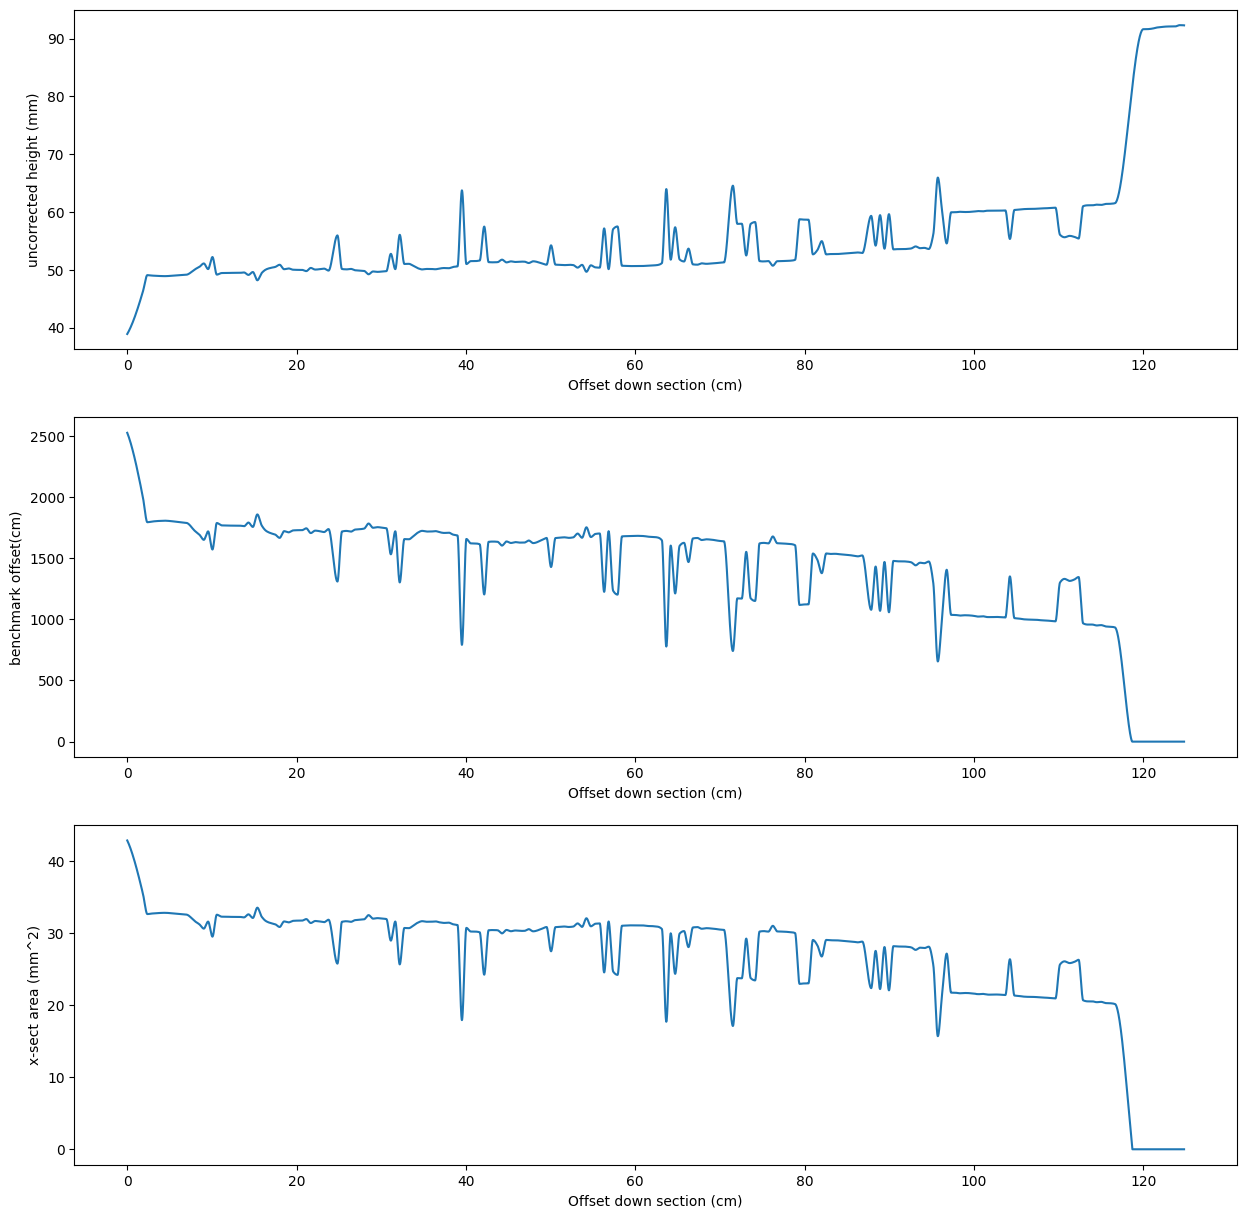

In [11]:
fig, ax = plt.subplots(3,1,figsize=(15,15))

axis = 0
ax[axis].plot(df['offset(cm)'], df['uncorr height(mm)'])
ax[axis].set_ylabel('uncorrected height (mm)')
ax[axis].set_xlabel('Offset down section (cm)')

axis = 1
ax[axis].plot(df['offset(cm)'], df['benchmark offset(cm)'])
ax[axis].set_ylabel('benchmark offset(cm)')
ax[axis].set_xlabel('Offset down section (cm)')

axis = 2
ax[axis].plot(df['offset(cm)'], df['x-sect area (mm^2)'])
ax[axis].set_ylabel('x-sect area (mm^2)')
ax[axis].set_xlabel('Offset down section (cm)')

#fig.suptitle('Profile measurement')
plt.show()